## Gradient Checking

In [22]:
import numpy as np
from init_utils import sigmoid, relu


In [23]:
def forward_propagation(x, theta):
    J = theta * x
    return J

In [24]:
x, theta = 2, 4
J = forward_propagation(x, theta)
print ("J = " + str(J))

J = 8


In [25]:
def backward_propagation(x, theta):
    dtheta = x
    return dtheta

In [26]:
x, theta = 2, 4
dtheta = backward_propagation(x, theta)
print("dheta = " + str(dtheta))

dheta = 2


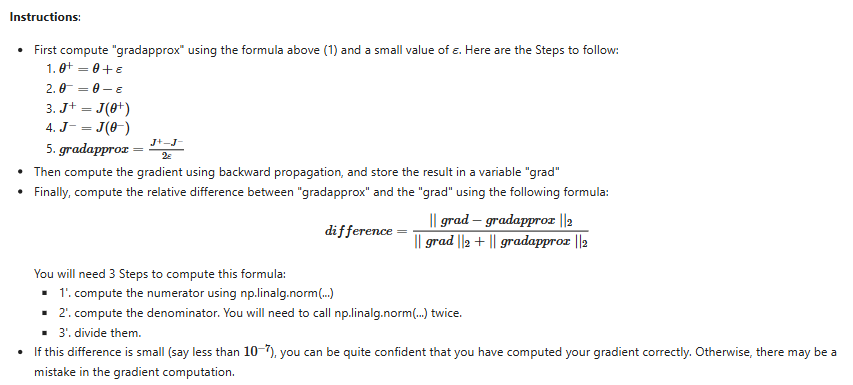

In [27]:
def gradient_check(x, theta, epsilon = 1e-7):
    thetaplus = theta + epsilon
    thetaminus = theta - epsilon
    J_plus = forward_propagation(x, thetaplus)
    J_minus = forward_propagation(x, thetaminus)
    gradapprox = (J_plus - J_minus) / (2 * epsilon)
    grad = backward_propagation(x, theta)

    numerator = np.linalg.norm(grad - gradapprox)
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)
    difference = numerator / denominator

    if difference < 1e-7:
        print("The gradient is correct!")
    else:
        print("The gradient is wrong!")
    return difference

    

In [28]:
x, theta = 2, 4
difference = gradient_check(x, theta)
print("difference = " + str(difference))

The gradient is correct!
difference = 2.919335883291695e-10


### N-dimensional gradient checking

In [29]:
def forward_propagation_n(x, y, parameters):
    m = x.shape[1]
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]

    Z1 = np.dot(W1, x) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    logprobs = np.multiply(-np.log(A3), y) + np.multiply(-np.log(1-A3), 1-y)
    cost = 1./m * np.sum(logprobs)

    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    
    return cost, cache



In [30]:
def backward_propagation_n(x, y, cache):
    m = x.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache

    dZ3 = A3 - y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims=True)

    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, x.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

#### Helper functions :::

In [31]:
def vector_to_dictionary(theta):
    parameters = {}
    parameters["W1"] = theta[:20].reshape((5, 4))
    parameters["b1"] = theta[20:25].reshape((5, 1))
    parameters["W2"] = theta[25:40].reshape((3, 5))
    parameters["b2"] = theta[40:43].reshape((3, 1))
    parameters["W3"] = theta[43:46].reshape((1, 3))
    parameters["b3"] = theta[46:47].reshape((1, 1))
    return parameters

In [32]:
def dictionary_to_vector(parameters):
    keys = []
    grads_list = []
    for key in ["W1", "b1", "W2", "b2", "W3", "b3"]:
        grads_list.append(parameters[key].reshape(-1))
    
    grad_vector = np.concatenate(grads_list)
    
    return grad_vector, keys

In [33]:
def gradient_check_n_test_case():
    np.random.seed(1)
    x = np.random.randn(4, 3)
    y = np.array([[1, 0, 1]]) # Corrected: 'y' values changed to 0s and 1s
    w1 = np.random.randn(5, 4)
    b1 = np.random.randn(5, 1)
    w2 = np.random.randn(3, 5)
    b2 = np.random.randn(3, 1)
    w3 = np.random.randn(1, 3)
    b3 = np.random.randn(1, 1)
    
    parameters = {"W1": w1,
                  "b1": b1,
                  "W2": w2,
                  "b2": b2,
                  "W3": w3,
                  "b3": b3}
    
    return x, y, parameters

In [39]:
def gradients_to_vector(gradients):
    grads_list = []
    
    # Iterate through the gradients for each parameter
    for key in ["dW1", "db1", "dW2", "db2", "dW3", "db3"]:
        grads_list.append(gradients[key].reshape(-1))
    
    # Concatenate the arrays into a single vector
    grad_vector = np.concatenate(grads_list)
    
    return grad_vector

In [46]:
def gradient_check_n(parameters, gradients, X, Y, epsilon=1e-7):
    parameters_values, _ = dictionary_to_vector(parameters)
    num_parameters = parameters_values.shape[0]
    grad = gradients_to_vector(gradients).reshape((num_parameters, 1))
    J_plus = np.zeros((num_parameters, 1))
    J_minus = np.zeros((num_parameters, 1))
    gradapprox = np.zeros((num_parameters, 1))
    
    # Compute gradapprox
    for i in range(num_parameters):
        thetaplus = np.copy(parameters_values)
        thetaplus[i] = thetaplus[i] + epsilon # Correction: Removed [0] index
        J_plus[i], _ = forward_propagation_n(X, Y, vector_to_dictionary(thetaplus))
        
        thetaminus = np.copy(parameters_values)
        thetaminus[i] = thetaminus[i] - epsilon # Correction: Removed [0] index
        J_minus[i], _ = forward_propagation_n(X, Y, vector_to_dictionary(thetaminus))
        
        gradapprox[i] = (J_plus[i] - J_minus[i]) / (2 * epsilon)

    numerator = np.linalg.norm(grad - gradapprox)
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)
    difference = numerator / denominator

    if difference > 2e-7:
        print("\033[93m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
    else:
        print("\033[92m" + "Your backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")
    
    return difference

I just reshaped the 1-D NumPy array into a 2-D column vector.
That prevents NumPy’s unwanted broadcasting when subtracting from `gradapprox`.

Exactly — reshaping stopped NumPy from broadcasting the `(n,)` array against the `(n,1)` array.

Because of broadcasting, instead of subtracting element-by-element, NumPy expanded them into a full **matrix** of shape `(n, n)`.

So each scalar gradient difference got repeated across a row/column, and when you took the norm, it blew up to a large wrong value — making the gradient check fail even though backprop was actually correct.


In [47]:
X, Y, parameters = gradient_check_n_test_case()

cost, cache = forward_propagation_n(X, Y, parameters)
gradients = backward_propagation_n(X, Y, cache)
difference = gradient_check_n(parameters, gradients, X, Y)

Your backward propagation works perfectly fine! difference = 2.2871989519785707e-09


## Conclusion:
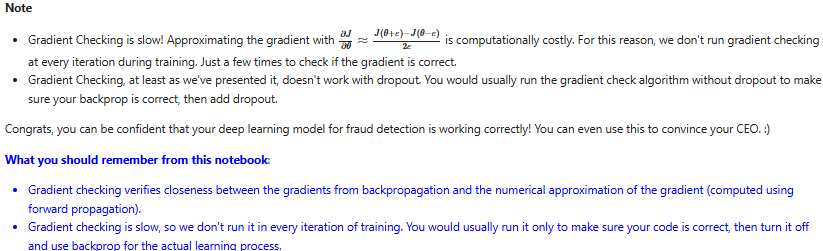